In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from tqdm.notebook import tqdm
from scipy import  stats

In [2]:
data = pd.read_csv('STORAGE_data/es-1min_FULL.csv')
normal_datetime = data
normal_datetime.index = pd.to_datetime(normal_datetime.date + ' ' + normal_datetime.time)

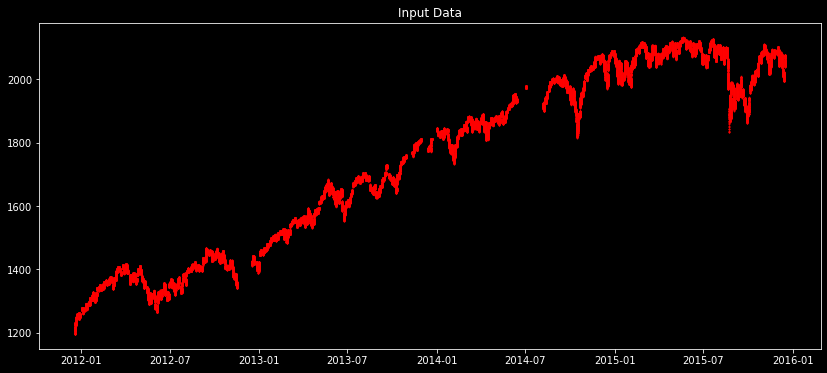

In [3]:
plt.style.use('dark_background')
plt.figure(figsize=(14,6))
plt.title('Input Data')
plt.plot(normal_datetime.open, 'o', markersize=.8, alpha=.7, color='red')
plt.show()

TIME LAGS CREATED:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]


  0%|          | 0/64 [00:00<?, ?it/s]

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1308/3425878386.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_b = (1 / m) * _buff_
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1308/3425878386.py:29: RuntimeWarning: invalid value encountered in double_scalars
  sigma_b = (1 / m) * _buff_


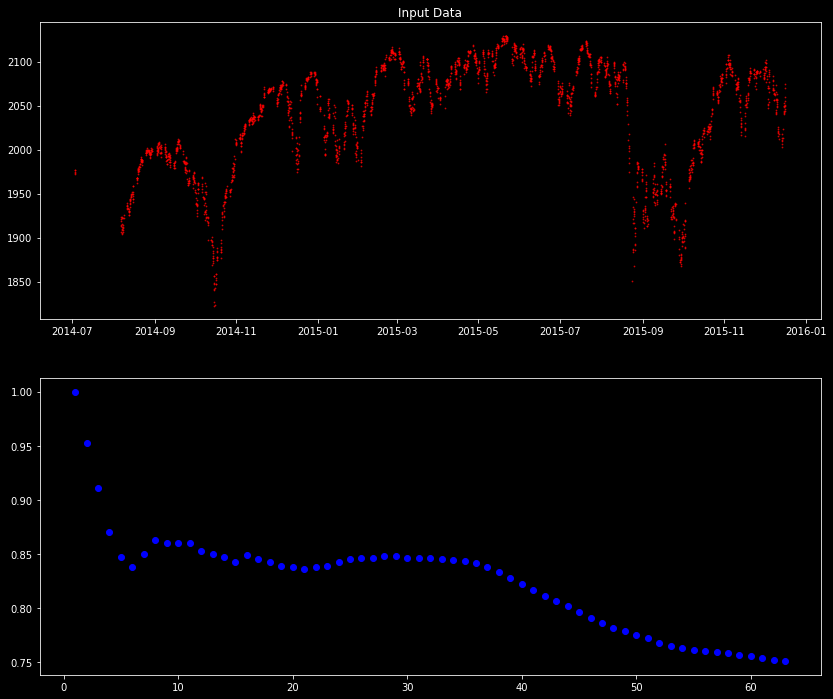

In [7]:
"""
SOURCE:     https://www.youtube.com/watch?v=LZHQdcaC964
"""
def variance_ratio(q_position, df: pd.DataFrame):
    MR = list()
    plt.style.use('dark_background')
    plt.figure(figsize=(14,12))
    plt.subplot(2,1,1)
    plt.title('Input Data')
    plt.plot(df.close, 'o', markersize=.8, alpha=.7, color='red')
    plt.subplot(2,1,2)
    #   Create time_lags like 2 ** k
    #time_lags = [1] + [2 ** i for i in range(1, q_position+1)]
    ret = np.log(df.close.dropna())
    #ret = ret.pct_change()[1:].dropna()
    #ret = ret.diff().dropna()
    time_lags = np.arange(0, 2 ** q_position, 1)
    print('TIME LAGS CREATED: ', time_lags)
    for EA, time_lag in tqdm(enumerate(time_lags), total=len(time_lags)):
        buff_size = len(ret)
        means = (1 / buff_size) * np.sum(ret.diff().dropna())
        m = time_lag * (buff_size - time_lag + 1) * (1 - (time_lag / buff_size))
        sigma_a = (1 / (buff_size - 1)) * np.sum(np.square(ret.diff().dropna() - means))
        _buff_ = 0
        _arr_buff_ = ret.values
        for k in range(time_lag, buff_size):
            _buff_ += np.square(_arr_buff_[k] - _arr_buff_[k - time_lag] - time_lag * means)
        del _arr_buff_
        sigma_b = (1 / m) * _buff_
        result = (sigma_b / sigma_a)
        plt.plot(time_lag, result, 'o', color='blue')
"""     Not work correctly
        buff = ret.rolling(time_lag).sum().dropna()
        VARIANCE_ARRAY.append(np.std(buff, ddof=1))
        VARIANCE_RATIO_ARRAY.append((VARIANCE_ARRAY[EA] / (time_lag * VARIANCE_ARRAY[0])) - 1)
        #   QUESTION: len of buffer or len of raw data?
        SIGMA_FOR_VR.append(2 * (time_lag - 1) * (2 * time_lag - 1) / (3 * time_lag * len(buff)))
        STD_FOR_VR.append(np.sqrt(SIGMA_FOR_VR[EA]))
        Z_STAT.append((VARIANCE_RATIO_ARRAY[EA]) / STD_FOR_VR[EA])
        P_VALUE.append(round(stats.norm.cdf(abs(Z_STAT[EA])), 4))"""
"""
    print(VARIANCE_RATIO_ARRAY)
    print(SIGMA_FOR_VR)
    print(STD_FOR_VR)
    print(Z_STAT)
    print(P_VALUE)"""



variance_ratio(6, normal_datetime.resample('1H'
                                  '').first()['2014-07': '2016-01'])

